In [1]:
import pandas as pd
import numpy as np

In [2]:
epr= pd.read_csv('Electric_Production.csv')

In [3]:
epr.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [4]:
epr.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [6]:
epr.IPG2211A2N

0       72.5052
1       70.6720
2       62.4502
3       57.4714
4       55.3151
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

In [46]:
train,val= epr.values[:,1][:300],epr.values[:,1][300:]

In [47]:
import torch
import torch.nn as nn
import torch.functional as F

In [48]:
class TSeries(nn.Module):
    def __init__(self,):
        super().__init__()
        self.model= nn.LSTM(1,1)
    def forward(self,x):
        return self.model(x)

In [49]:
loss= nn.MSELoss()

In [50]:
train.mean(),train.std()

(np.float64(84.39435099999999), np.float64(14.148404779756353))

In [51]:
train= (train-84.3935) /14.1484
val= (val-84.3935) /14.1484

In [75]:
def create_dataset(data):
    return [[data[:i],data[i]] for i in range(1,len(data))]

In [60]:
from torch.utils.data import DataLoader

In [76]:
trainloader= DataLoader(create_dataset(train.astype(np.float32)),batch_size=1)
valloader= DataLoader(create_dataset(val.astype(np.float32)),batch_size=1)

In [72]:
from torch.optim import Adam

In [120]:
model= TSeries2()
optimizer= Adam(model.parameters(),lr=3e-4)

In [121]:
for e in range(100):
    model.train()
    L=0
    for i,t in trainloader:
        optimizer.zero_grad()
        o= model(i.view(-1,1).float()) 
        l= loss(o,t.float())
        #print(o.shape)
        l.backward()
        optimizer.step()
        L+= l.data
    print(f'Epoch {e} Loss {L.data/299:.3f}')        
    model.eval()
    L=0
    for i,t in valloader:
        o= model(i.view(-1,1).float()) 
        l= loss(o,t.float())
        L+= l.data
    print(f'Val Loss {L.data/96:.3f}')        

Epoch 0 Loss 0.934
Val Loss 1.550
Epoch 1 Loss 0.691
Val Loss 0.877
Epoch 2 Loss 0.465
Val Loss 0.667
Epoch 3 Loss 0.390
Val Loss 0.617
Epoch 4 Loss 0.368
Val Loss 0.598
Epoch 5 Loss 0.352
Val Loss 0.585
Epoch 6 Loss 0.339
Val Loss 0.574
Epoch 7 Loss 0.328
Val Loss 0.564
Epoch 8 Loss 0.319
Val Loss 0.555
Epoch 9 Loss 0.312
Val Loss 0.547
Epoch 10 Loss 0.306
Val Loss 0.541
Epoch 11 Loss 0.301
Val Loss 0.535
Epoch 12 Loss 0.296
Val Loss 0.530
Epoch 13 Loss 0.292
Val Loss 0.525
Epoch 14 Loss 0.288
Val Loss 0.520
Epoch 15 Loss 0.284
Val Loss 0.516
Epoch 16 Loss 0.280
Val Loss 0.511
Epoch 17 Loss 0.276
Val Loss 0.507
Epoch 18 Loss 0.273
Val Loss 0.502
Epoch 19 Loss 0.269
Val Loss 0.497
Epoch 20 Loss 0.265
Val Loss 0.492
Epoch 21 Loss 0.262
Val Loss 0.487
Epoch 22 Loss 0.258
Val Loss 0.481
Epoch 23 Loss 0.254
Val Loss 0.475
Epoch 24 Loss 0.250
Val Loss 0.469
Epoch 25 Loss 0.246
Val Loss 0.462
Epoch 26 Loss 0.242
Val Loss 0.455
Epoch 27 Loss 0.238
Val Loss 0.448
Epoch 28 Loss 0.234
Val Loss 0

In [87]:
import matplotlib.pyplot as plt

In [123]:
val_preds,vt=[],[]
for i,t in valloader:
    o= model(i.view(-1,1).float())
    vt.append(t.data)
    val_preds.append(o.data[0])

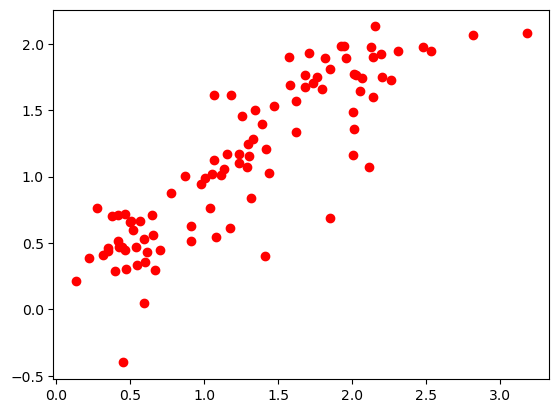

In [125]:
plt.plot(vt,val_preds,'ro') # there definitely is a correlation between predictions and targets

The model just learnt a single value, gives it to everything.Change it to have 10 as hidden size.

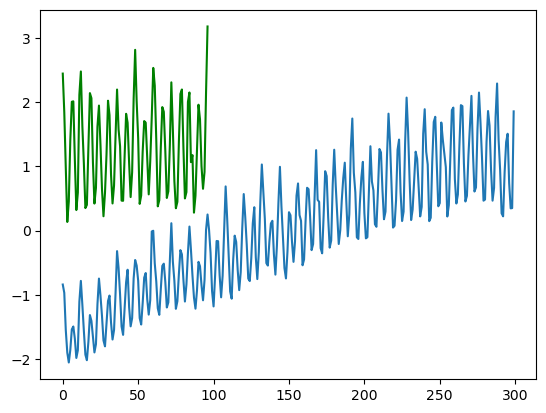

In [126]:
plt.plot(train)
plt.plot(val,'g')

In [114]:
class TSeries2(nn.Module):
    def __init__(self,):
        super().__init__()
        self.model= nn.LSTM(1,10)
        self.linear= nn.Linear(10,1)
    def forward(self,x):
        return self.linear(self.model(x)[0])[-1]

This is doing very well, increasing hidden size made it do so well.This looks more than enough as it even might overfit if trained more.